In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [10]:
tos_ensmean = xr.open_dataset('/work5/stb/MHW-gfdl/Collab-LG_SS/NWA12/tos_ensmean_gom.nc', chunks={})
tos_ensclim = xr.open_dataset('/work5/stb/MHW-gfdl/Collab-LG_SS/NWA12/tos_ensclim_gom.nc', chunks={})

In [11]:
tos_ensmean.tos

<xarray.DataArray 'tos' (init: 120, lead: 366, yh: 185, xh: 226)> Size: 7GB
dask.array<open_dataset-tos, shape=(120, 366, 185, 226), dtype=float32, chunksize=(24, 74, 37, 46), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 2kB -98.0 -97.92 -97.84 -97.76 ... -80.16 -80.08 -80.0
  * yh       (yh) float64 1kB 17.56 17.63 17.71 17.79 ... 30.73 30.8 30.87 30.94
  * lead     (lead) int64 3kB 0 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
  * init     (init) datetime64[ns] 960B 1994-01-01 1994-04-01 ... 2023-10-01
    member   (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
    month    (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [58]:
jan_init = tos_ensmean.tos[tos_ensmean.init==tos_ensmean.init.where(tos_ensmean.init.dt.month==1)]
april_init = tos_ensmean.tos[tos_ensmean.init==tos_ensmean.init.where(tos_ensmean.init.dt.month==4)]
july_init = tos_ensmean.tos[tos_ensmean.init==tos_ensmean.init.where(tos_ensmean.init.dt.month==7)]
oct_init = tos_ensmean.tos[tos_ensmean.init==tos_ensmean.init.where(tos_ensmean.init.dt.month==10)]

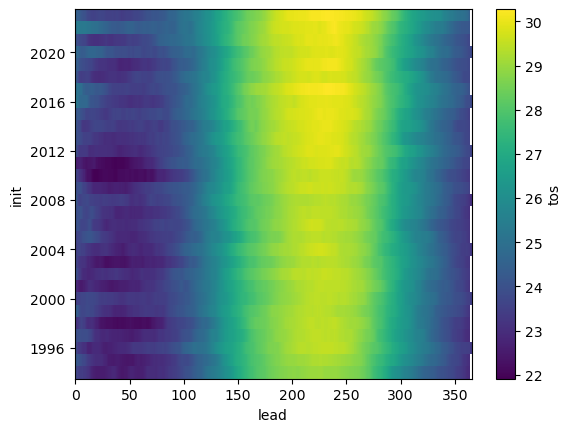

In [61]:
jan_init.mean(['xh','yh']).plot()

In [55]:
t = xr.open_dataset('https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.sst/dods', decode_times=False, chunks={})

In [78]:
t = xr.open_dataset('/work5/stb/MHW-gfdl/NWA12/subset.nc', chunks={})

In [79]:
t

<xarray.Dataset> Size: 289MB
Dimensions:  (time: 16101, lon: 80, lat: 56)
Coordinates:
  * time     (time) datetime64[ns] 129kB 1981-09-01 1981-09-02 ... 2025-09-30
  * lon      (lon) float32 320B 280.1 280.4 280.6 280.9 ... 299.4 299.6 299.9
  * lat      (lat) float32 224B 33.12 33.38 33.62 33.88 ... 46.38 46.62 46.88
Data variables:
    sst      (time, lat, lon) float32 289MB dask.array<chunksize=(1, 56, 80), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    institution:    NOAA/NCDC
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...
    history:        01-Oct-2025 12:43:20 Subset NOAA/PSL

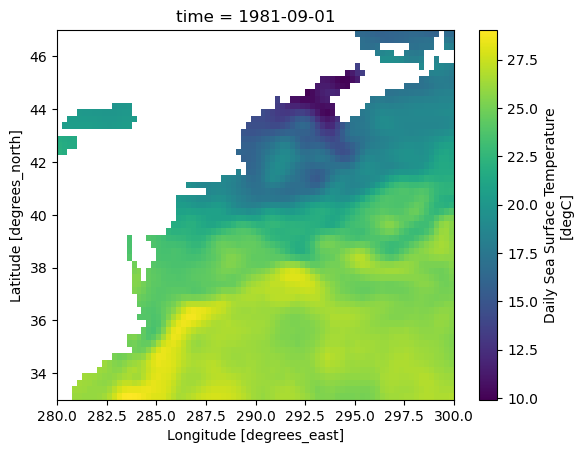

In [80]:
t.sst[0].plot()

_____ __SHANICE'S REGION__ _______

In [ ]:
gom_dict = dict(xh=slice(-98,-80), yh=slice(17.5, 31))
tos_gom = tos.sel(**gom_dict)
tob_gom = tob.sel(**gom_dict)
tos_clim_gom = tos_clim.sel(**gom_dict)
tob_clim_gom = tob_clim.sel(**gom_dict)

In [17]:
#save before the govt shutdown
tos_gom.tos.to_netcdf('NWA12/tos_ensmean_gom.nc')

In [18]:
#save before the govt shutdown
tob_gom.tob.to_netcdf('NWA12/tob_ensmean_gom.nc')

In [33]:
#save before the govt shutdown
tos_clim_gom.to_netcdf('NWA12/tos_ensclim_gom.nc')

In [34]:
#save before the govt shutdown
tob_clim_gom.to_netcdf('NWA12/tob_ensclim_gom.nc')

_____ __SAM'S & LAURA'S REGION__ _______

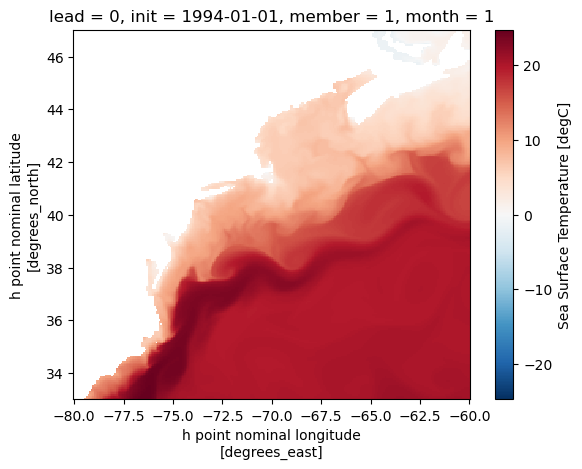

In [27]:
tos.tos[0,0].sel(yh=slice(33, 47), xh=slice(-80, -60)).plot()

In [28]:
scallops_dict = dict(yh=slice(33, 47), xh=slice(-80, -60))
tos_scallops = tos.sel(**scallops_dict)
tob_scallops = tob.sel(**scallops_dict)
tos_clim_scallops = tos_clim.sel(**scallops_dict)
tob_clim_scallops = tob_clim.sel(**scallops_dict)

In [31]:
#save before the govt shutdown
tos_scallops.tos.to_netcdf('NWA12/tos_ensmean_hatt-fundy.nc')

In [32]:
#save before the govt shutdown
tob_scallops.tob.to_netcdf('NWA12/tob_ensmean_hatt-fundy.nc')

In [35]:
#save before the govt shutdown
tos_clim_scallops.to_netcdf('NWA12/tos_ensclim_hatt-fundy.nc')

In [36]:
#save before the govt shutdown
tob_clim_scallops.to_netcdf('NWA12/tob_ensclim_hatt-fundy.nc')

In [30]:
tos_scallops.tos

<xarray.DataArray 'tos' (init: 120, lead: 366, yh: 230, xh: 251)> Size: 10GB
dask.array<getitem, shape=(120, 366, 230, 251), dtype=float32, chunksize=(12, 37, 85, 78), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 2kB -80.0 -79.92 -79.84 -79.76 ... -60.16 -60.08 -60.0
  * yh       (yh) float64 2kB 33.04 33.11 33.17 33.24 ... 46.88 46.93 46.99
  * lead     (lead) int64 3kB 0 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
  * init     (init) datetime64[ns] 960B 1994-01-01 1994-04-01 ... 2023-10-01
    member   (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
    month    (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [3]:
tos_gom

<xarray.Dataset> Size: 15GB
Dimensions:   (init: 120, lead: 366, yh: 185, xh: 226)
Coordinates:
  * xh        (xh) float64 2kB -98.0 -97.92 -97.84 ... -80.16 -80.08 -80.0
  * yh        (yh) float64 1kB 17.56 17.63 17.71 17.79 ... 30.8 30.87 30.94
  * lead      (lead) int64 3kB 0 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
  * init      (init) datetime64[ns] 960B 1994-01-01 1994-04-01 ... 2023-10-01
    member    (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
    month     (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
Data variables:
    tos       (init, lead, yh, xh) float32 7GB dask.array<chunksize=(12, 37, 13, 78), meta=np.ndarray>
    tos_anom  (init, lead, yh, xh) float32 7GB dask.array<chunksize=(12, 37, 13, 78), meta=np.ndarray>
Attributes:
    NumFilesInSet:               1
    title:                       NWA12_cobalt_forecast_2024_09_1994-01-e01
    associated_files:            areacello: 19940101.ocean_static.nc
    grid_type:                   regular
    grid_tile:                   N/A
    cefi_archive_version_ens01:  /archive/Andrew.C.Ross/fre/NWA/2024_09/NWA12...

In [4]:
tob_gom

<xarray.Dataset> Size: 15GB
Dimensions:   (init: 120, lead: 366, yh: 185, xh: 226)
Coordinates:
  * xh        (xh) float64 2kB -98.0 -97.92 -97.84 ... -80.16 -80.08 -80.0
  * yh        (yh) float64 1kB 17.56 17.63 17.71 17.79 ... 30.8 30.87 30.94
  * lead      (lead) int64 3kB 0 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
  * init      (init) datetime64[ns] 960B 1994-01-01 1994-04-01 ... 2023-10-01
    member    (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
    month     (init) int32 480B dask.array<chunksize=(120,), meta=np.ndarray>
Data variables:
    tob       (init, lead, yh, xh) float32 7GB dask.array<chunksize=(12, 37, 13, 78), meta=np.ndarray>
    tob_anom  (init, lead, yh, xh) float32 7GB dask.array<chunksize=(12, 37, 13, 78), meta=np.ndarray>
Attributes:
    NumFilesInSet:               1
    title:                       NWA12_cobalt_forecast_2024_09_1994-01-e01
    associated_files:            areacello: 19940101.ocean_static.nc
    grid_type:                   regular
    grid_tile:                   N/A
    cefi_archive_version_ens01:  /archive/Andrew.C.Ross/fre/NWA/2024_09/NWA12...

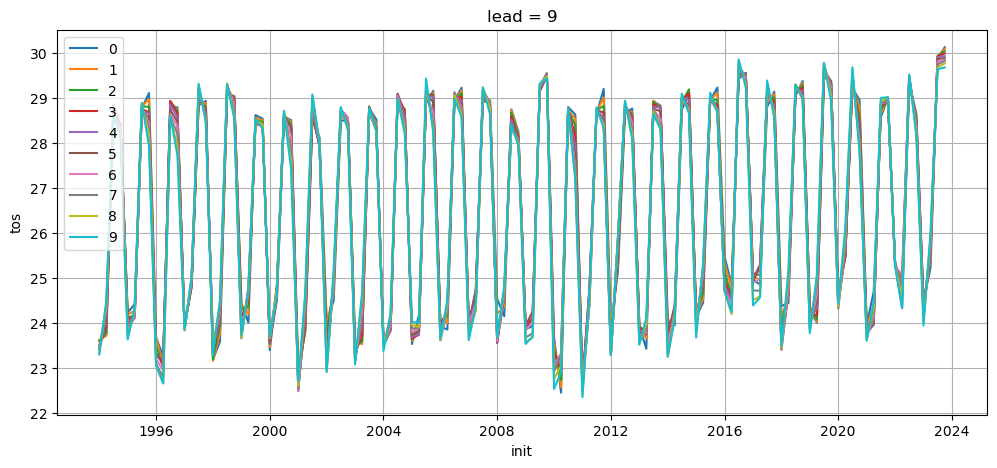

In [49]:
plt.figure(figsize=(12,5))
for (i,j) in zip(tos_gom.lead[:10], np.arange(0,10)):
    tos_gom.tos.mean(['xh','yh']).isel(lead=i).plot(label=f'{j}')
plt.legend()
plt.grid();

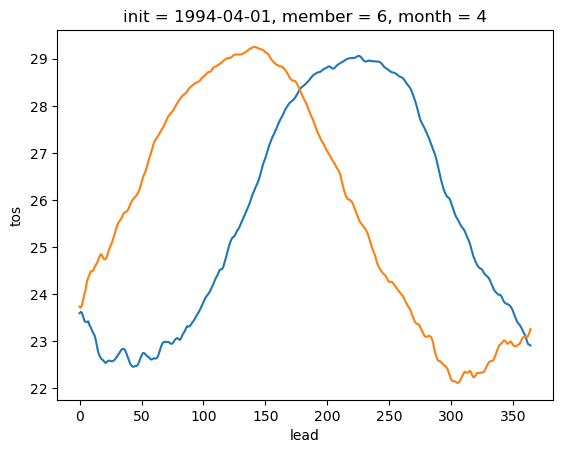

In [11]:
tos_gom.tos.mean(['xh','yh'])[0].plot()
tos_gom.tos.mean(['xh','yh'])[1].plot()

In [81]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_glo_phy_my_0.083deg_P1D-m",
  variables=["bottomT"],
  minimum_longitude=-80,
  maximum_longitude=-60,
  minimum_latitude=33,
  maximum_latitude=47,
  start_datetime="1993-01-01T00:00:00",
  end_datetime="2021-06-30T00:00:00",
  minimum_depth=0.49402499198913574,
  maximum_depth=5727.9169921875,
)

INFO - 2025-10-01T19:21:52Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  sbailey2


Copernicus Marine password:

  ········


INFO - 2025-10-01T19:22:19Z - Selected dataset version: "202311"
INFO - 2025-10-01T19:22:19Z - Selected dataset part: "default"
INFO - 2025-10-01T19:22:22Z - Starting download. Please wait...


  0%|          | 0/708 [00:00<?, ?it/s]

INFO - 2025-10-01T19:29:17Z - Successfully downloaded to cmems_mod_glo_phy_my_0.083deg_P1D-m_bottomT_80.00W-60.00W_33.00N-47.00N_1993-01-01-2021-06-30.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_phy_my_0.083deg_P1D-m_bottomT_80.00W-60.00W_33.00N-47.00N_1993-01-01-2021-06-30.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_phy_my_0.083deg_P1D-m_bottomT_80.00W-60.00W_33.00N-47.00N_1993-01-01-2021-06-30.nc', file_size=808.9966488549619, data_transfer_size=4684.823450381679, variables=['bottomT'], coordinates_extent=[GeographicalExtent(minimum=-80.0, maximum=-60.0, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=33.0, maximum=47.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='1993-01-01T00:00:00+00:00', maximum='2021-06-30T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')